In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [7]:
# lets read the datafile
sal_d_train=pd.read_csv("SalaryData_Train(1).csv")
sal_d_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<Figure size 1080x720 with 0 Axes>

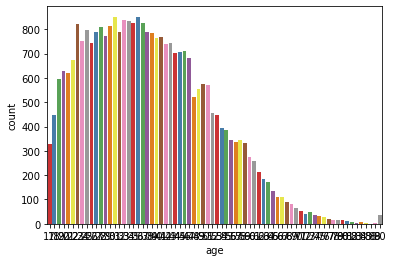

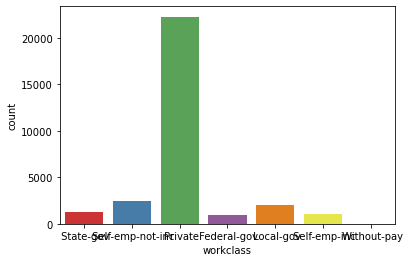

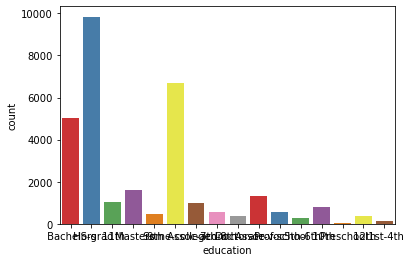

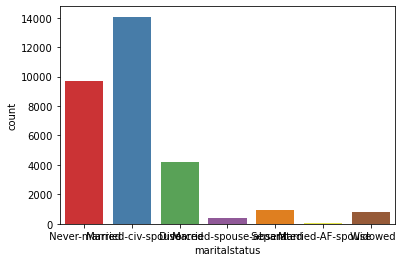

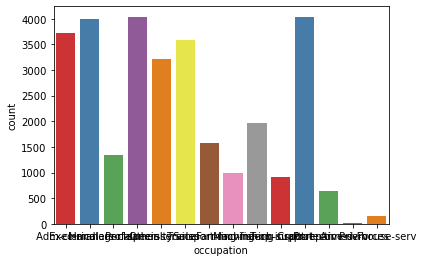

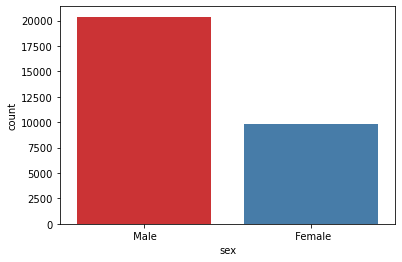

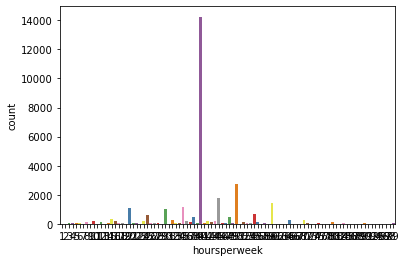

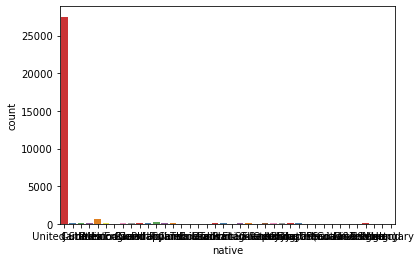

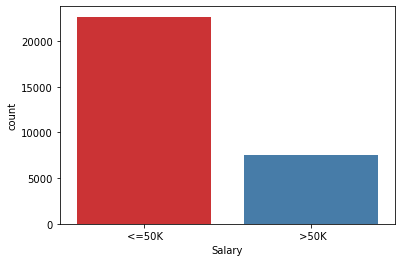

In [8]:
import seaborn as sns
plt.figure(figsize=(15,10))

cols=['age','workclass','education','maritalstatus','occupation','sex','hoursperweek','native','Salary']
for i in cols:
    plt.figure()
    sns.countplot(x=i,data=sal_d_train,palette='Set1')

<AxesSubplot:>

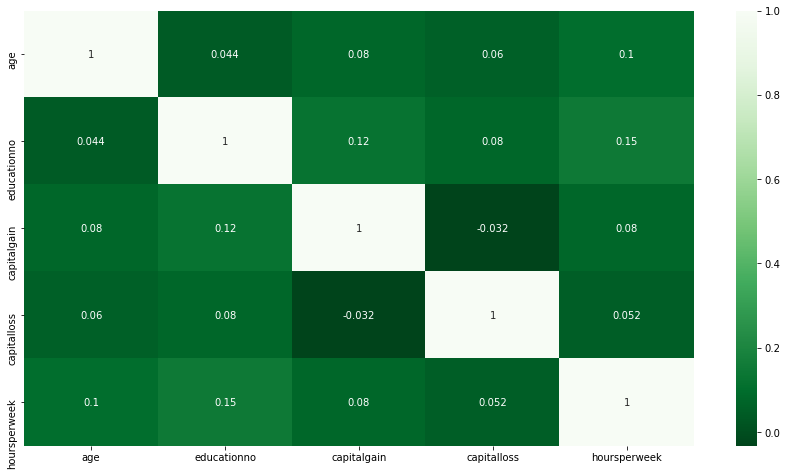

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(sal_d_train.corr(),annot=True,cmap='Greens_r')

In [12]:
sal_d_test=pd.read_csv("SalaryData_Test(1).csv")
sal_d_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


<Figure size 1080x720 with 0 Axes>

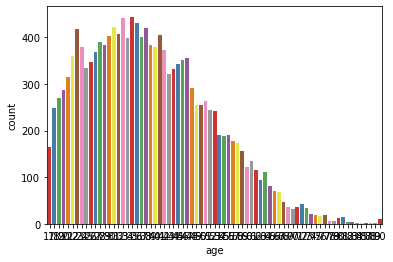

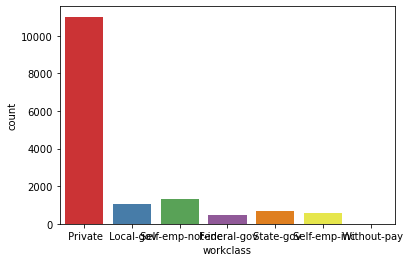

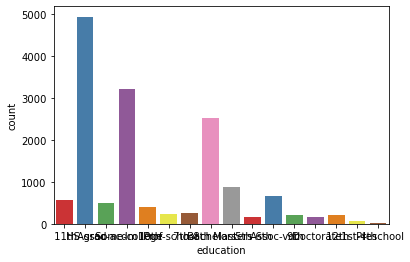

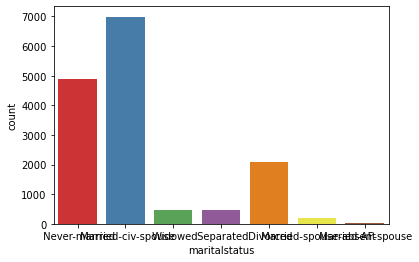

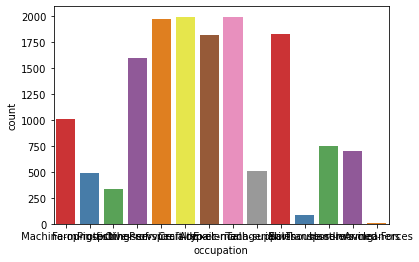

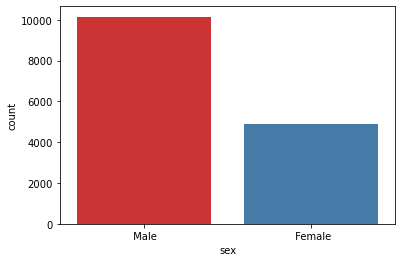

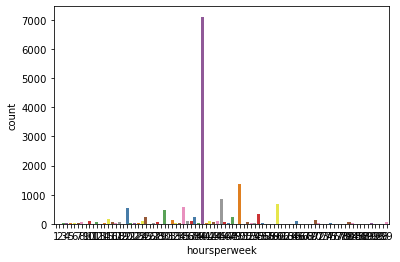

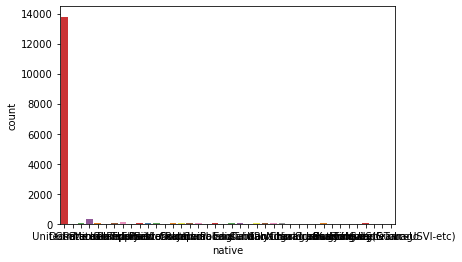

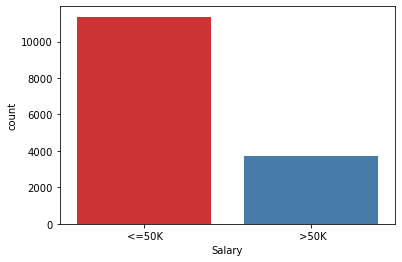

In [13]:
import seaborn as sns
plt.figure(figsize=(15,10))

cols=['age','workclass','education','maritalstatus','occupation','sex','hoursperweek','native','Salary']
for i in cols:
    plt.figure()
    sns.countplot(x=i,data=sal_d_test,palette='Set1')

<AxesSubplot:>

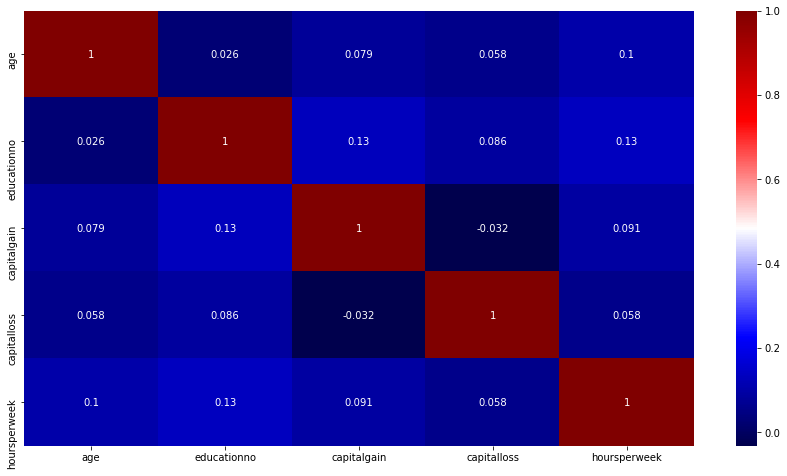

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(sal_d_test.corr(),annot=True,cmap='seismic')

LETS PERFROM SOME EDA ON THE DATA SETS

In [16]:
sal_d_train[sal_d_train.duplicated()].shape

(3258, 14)

In [19]:
sal_d_train.drop_duplicates().reset_index(drop=True)
sal_d_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
#lets drop the few uunneccesary features
sal_train=sal_d_train.drop(columns=['educationno','relationship','race'],axis=1)
sal_train

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,Widowed,Adm-clerical,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,Never-married,Adm-clerical,Male,0,0,20,United-States,<=50K


In [22]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
sal_train['workclass']=lm.fit_transform(sal_train['workclass'])
sal_train['education']=lm.fit_transform(sal_train['education'])
sal_train['maritalstatus']=lm.fit_transform(sal_train['maritalstatus'])
sal_train['occupation']=lm.fit_transform(sal_train['occupation'])
sal_train['native']=lm.fit_transform(sal_train['native'])
sal_train['sex']=lm.fit_transform(sal_train['sex'])

In [23]:
sal_train.head()

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,2174,0,40,37,<=50K
1,50,4,9,2,3,1,0,0,13,37,<=50K
2,38,2,11,0,5,1,0,0,40,37,<=50K
3,53,2,1,2,5,1,0,0,40,37,<=50K
4,28,2,9,2,9,0,0,0,40,4,<=50K


In [24]:
# lets do for test data
sal_d_test[sal_d_test.duplicated()].shape

(930, 14)

In [25]:
sal_d_test.drop_duplicates().reset_index(drop=True)
sal_d_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [26]:
# lets drop the unneccsary features
sal_test=sal_d_test.drop(columns=['educationno','relationship','race'],axis=1)
sal_test

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,Never-married,Machine-op-inspct,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Male,7688,0,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,Never-married,Prof-specialty,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,Divorced,Prof-specialty,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,Divorced,Adm-clerical,Male,5455,0,40,United-States,<=50K


In [27]:
# lets convert the categorical data to lables by lable encoder
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
sal_test['workclass']=lm.fit_transform(sal_test['workclass'])
sal_test['education']=lm.fit_transform(sal_test['education'])
sal_test['maritalstatus']=lm.fit_transform(sal_test['maritalstatus'])
sal_test['sex']=lm.fit_transform(sal_test['sex'])
sal_test['native']=lm.fit_transform(sal_test['native'])
sal_test['occupation']=lm.fit_transform(sal_test['occupation'])

In [28]:
sal_test.head()

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,4,6,1,0,0,40,37,<=50K
1,38,2,11,2,4,1,0,0,50,37,<=50K
2,28,1,7,2,10,1,0,0,40,37,>50K
3,44,2,15,2,6,1,7688,0,40,37,>50K
4,34,2,0,4,7,1,0,0,30,37,<=50K


In [29]:
data_final=pd.concat([sal_train,sal_test],axis=0).reset_index(drop=True)
data_final

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,2174,0,40,37,<=50K
1,50,4,9,2,3,1,0,0,13,37,<=50K
2,38,2,11,0,5,1,0,0,40,37,<=50K
3,53,2,1,2,5,1,0,0,40,37,<=50K
4,28,2,9,2,9,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
45216,33,2,9,4,9,1,0,0,40,37,<=50K
45217,39,2,9,0,9,0,0,0,36,37,<=50K
45218,38,2,9,2,9,1,0,0,50,37,<=50K
45219,44,2,9,0,0,1,5455,0,40,37,<=50K


In [30]:
# lets divide the data into X an Y sections
X=data_final.iloc[:,0:9]
Y=data_final.iloc[:,-1]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=100)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30298, 9), (14923, 9), (30298,), (14923,))

LETS CONSIDER SVM TECHNIQUE

In [33]:
clf=SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print('accuracy_score using the rbf kernel',acc)
print(classification_report(y_pred,y_test))

accuracy_score using the rbf kernel 79.64216310393353
              precision    recall  f1-score   support

       <=50K       0.97      0.80      0.88     13571
        >50K       0.27      0.74      0.40      1352

    accuracy                           0.80     14923
   macro avg       0.62      0.77      0.64     14923
weighted avg       0.91      0.80      0.83     14923



In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10885,   352],
       [ 2686,  1000]], dtype=int64)

In [35]:
# using the SVM kernell linear
clf=SVC(kernel='sigmoid')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print('accuracy_score using the rbf kernel',acc)
print(classification_report(y_pred,y_test))

accuracy_score using the rbf kernel 79.92360785364873
              precision    recall  f1-score   support

       <=50K       0.97      0.80      0.88     13513
        >50K       0.28      0.74      0.41      1410

    accuracy                           0.80     14923
   macro avg       0.63      0.77      0.65     14923
weighted avg       0.90      0.80      0.83     14923



In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10877,   360],
       [ 2636,  1050]], dtype=int64)